<a href="https://colab.research.google.com/github/hajerhajjajifahem24/parse-server-codecraft/blob/master/Copie_de_Face_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Face Detection in OpenCV

In [3]:
# install pnslib
!pip install git+git://github.com/PnS2019/pnslib.git
!wget https://i.pinimg.com/736x/d6/a9/57/d6a957f1d8045c9c973c12bf5968326f.jpg

  Cloning git://github.com/PnS2019/pnslib.git to /tmp/pip-req-build-a4ncz4lg
  Running command git clone -q git://github.com/PnS2019/pnslib.git /tmp/pip-req-build-a4ncz4lg
  Created wheel for pnslib: filename=pnslib-0.1.0a1-cp36-none-any.whl size=1489619 sha256=f0e0f157f83fc38ba78f6b179525e748e79d1f14183cdaa48bd5a01ee2de4500
  Stored in directory: /tmp/pip-ephem-wheel-cache-_7m4e23n/wheels/a2/8e/a9/c62e72840009deaa723b3a113d5c3b90acac77098d16e90eca
Successfully built pnslib
--2019-11-07 14:47:02--  https://i.pinimg.com/736x/d6/a9/57/d6a957f1d8045c9c973c12bf5968326f.jpg
Resolving i.pinimg.com (i.pinimg.com)... 92.122.252.52, 2a04:4e42:9::84
Connecting to i.pinimg.com (i.pinimg.com)|92.122.252.52|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 105889 (103K) [image/jpeg]
Saving to: ‘d6a957f1d8045c9c973c12bf5968326f.jpg’

d6a957f1d8045c9c973 100%[===================>] 103.41K  --.-KB/s    in 0.02s   

2019-11-07 14:47:02 (6.27 MB/s) - ‘d6a957f1d8045c9c973c12bf5968

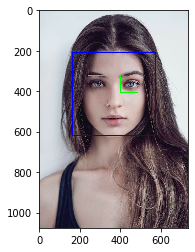

In [8]:
import cv2
from pnslib import utils
import matplotlib.pyplot as plt

# read image
img = cv2.imread("d6a957f1d8045c9c973c12bf5968326f.jpg")

# load face cascade and eye cascade
face_cascade = cv2.CascadeClassifier(
    utils.get_haarcascade_path('haarcascade_frontalface_default.xml'))
eye_cascade = cv2.CascadeClassifier(
    utils.get_haarcascade_path('haarcascade_eye.xml'))

# search face
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

faces = face_cascade.detectMultiScale(gray, 1.3, 5)

for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex, ey, ew, eh) in eyes:
        cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (0, 255, 0), 2)


img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure()
plt.imshow(img)
plt.show()